In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy import cos
from math import log

#### Análise ao longo dos 5 anos de estudo:

In [2]:
T1=27.4
T2=0.025
omega1=0.02
phi1=1.53

R1=196.9
R2=0.033
omega2=0.025
phi2=1.99

B_E=200
p_ME=0.9
p_ML=0.25
p_MP=0.75
tau_E=1
tau_P=1
c1=0.00554
c2=-0.06737
D1=36.5
b1=0.1
A=-0.03
B=1.31
C=-4.4
b2=0.3
tau_H=10
DD=105
Tmin=14.5
gamma= 1/1095 #1/365
R_L = 50
N=8558
M= 300000 #100000
I_M0=50000 # None
I_H0=1000 
if I_M0 is None:
        I_M0 = M / 100

S_H0 = N - I_H0

In [3]:
def lotkavolterra(t, z, T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0):
    S, I, R = z
    
    # Funções de temperatura e chuva
    def Temp(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))

    def Rain(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))

    # Duração da fase de desenvolvimento das larvas
    def tau_L(Temp):
        return 1 / (c1 * Temp + c2)
    
    # Taxa diária de sobrevivência dos mosquitos
    def p(Temp):
        return np.exp(-1 / (A*Temp**2 + B*Temp + C))
    
    # Probabilidade de sobrevivência das larvas dependente de temperatura e chuva
    def p_LT(Temp):
        return np.exp(-(c1 * Temp + c2))
    
    def p_LR(Rain):
        return (4*p_ML/R_L**2) * Rain * (R_L - Rain)
    
    def p_LRT(Rain,Temp):
        return p_LR(Rain)*p_LT(Temp)
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_ER(Rain):
        return (4*p_ME/R_L**2) * Rain * (R_L - Rain)
    
    # Probabilidade de sobrevivência dos ovos e pupas dependente de chuva (Não definido previamente)
    def p_PR(Rain):
        return (4*p_MP/R_L**2) * Rain * (R_L - Rain)

    # Duração do ciclo esporogônico
    def tau_M(Temp):
        return DD / (Temp - Tmin)

    # Definindo a função de sobrevivência do mosquito
    def l(tau_M, Temp):  
        p_T = p(Temp)
        return p_T**tau_M

    # Definindo a taxa de mortalidade do mosquito
    def mu(Temp):
        return -log(p(Temp))

    R_curr = Rain(t)
    T_curr = Temp(t)
    
    # Calcula a taxa de mordida e probabilidade de transmissão
    def a(Temp):
        return (T_curr - T1) / D1
    
    a_curr = a(T_curr)
    
    def b(Rain,Temp):
        return B_E * p_ME * p_LRT(R_curr,T_curr) * p_MP / (tau_E + tau_L(T_curr) + tau_P)
    
    dSdt = -a_curr * b2 * (I_M0 / N) * S
    dIdt = a_curr * b2 * (I_M0 / N) * S - gamma * I
    dRdt = gamma * I
    
    return [dSdt, dIdt, dRdt] 

In [4]:
args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

# Calculando a evolução da doença ao longo dos 5 anos da análise
t_eval = np.linspace(0, 1825, 1000)  # Avalia a solução em 1000 pontos entre 0 e 1825
sol = solve_ivp(lotkavolterra, [0, 1825], [S_H0, I_H0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")

In [5]:
times = sol.t
S, I, R = sol.y

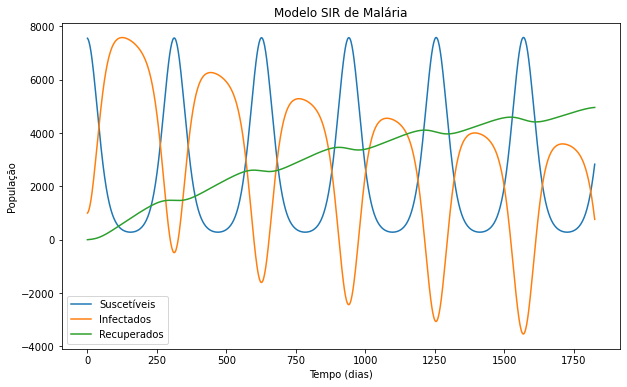

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Suscetíveis')
plt.plot(times, I, label='Infectados')
plt.plot(times, R, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

#### Análise em 2004:

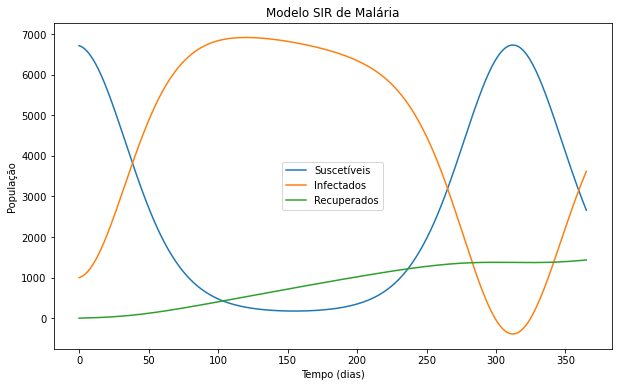

In [7]:
N=7717
I_H0=1000 
if I_M0 is None:
        I_M0 = M / 100

S_H0 = N - I_H0

args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

t_eval = np.linspace(0, 365, 1000)  # Avalia a solução em 1000 pontos entre 0 e 365
sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")

times = sol.t
S, I, R = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Suscetíveis')
plt.plot(times, I, label='Infectados')
plt.plot(times, R, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

#### Análise em 2005:

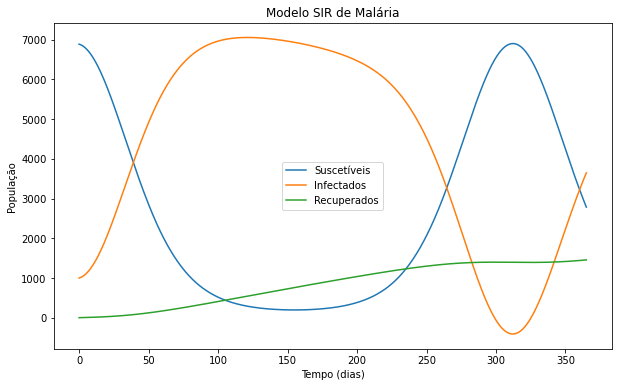

In [8]:
N=7889
I_H0=1000 
if I_M0 is None:
        I_M0 = M / 100

S_H0 = N - I_H0

args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

t_eval = np.linspace(0, 365, 1000)  # Avalia a solução em 1000 pontos entre 0 e 365
sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")

times = sol.t
S, I, R = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Suscetíveis')
plt.plot(times, I, label='Infectados')
plt.plot(times, R, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

#### Análise em 2006:

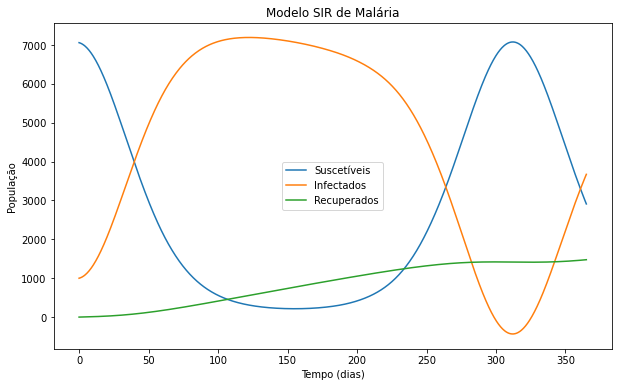

In [9]:
N=8061
I_H0=1000 
if I_M0 is None:
        I_M0 = M / 100

S_H0 = N - I_H0

args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

t_eval = np.linspace(0, 365, 1000)  # Avalia a solução em 1000 pontos entre 0 e 365
sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")

times = sol.t
S, I, R = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Suscetíveis')
plt.plot(times, I, label='Infectados')
plt.plot(times, R, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

#### Análise em 2007:

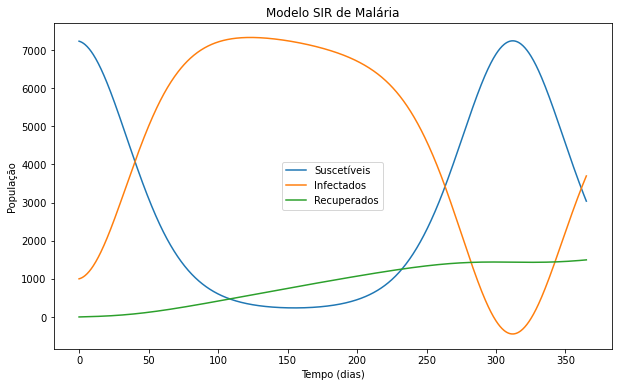

In [10]:
N=8233
I_H0=1000 
if I_M0 is None:
        I_M0 = M / 100

S_H0 = N - I_H0

args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

t_eval = np.linspace(0, 365, 1000)  # Avalia a solução em 1000 pontos entre 0 e 365
sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")

times = sol.t
S, I, R = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Suscetíveis')
plt.plot(times, I, label='Infectados')
plt.plot(times, R, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

#### Análise em 2008:

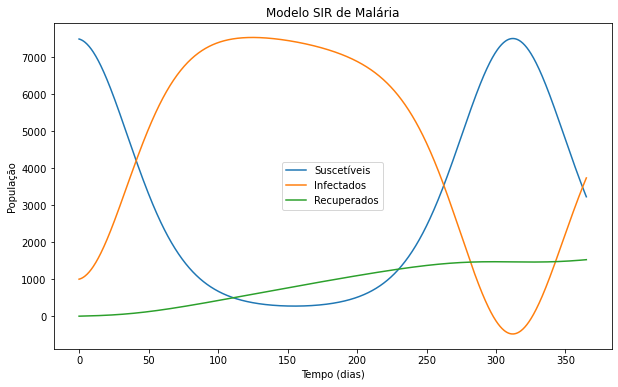

In [11]:
N=8492
I_H0=1000 
if I_M0 is None:
        I_M0 = M / 100

S_H0 = N - I_H0

args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
                   B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
                   D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
                   N, M, I_M0, I_H0)

t_eval = np.linspace(0, 365, 1000)  # Avalia a solução em 1000 pontos entre 0 e 365
sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")

times = sol.t
S, I, R = sol.y

plt.figure(figsize=(10, 6))
plt.plot(times, S, label='Suscetíveis')
plt.plot(times, I, label='Infectados')
plt.plot(times, R, label='Recuperados')

plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.title('Modelo SIR de Malária')

plt.legend()

plt.show()

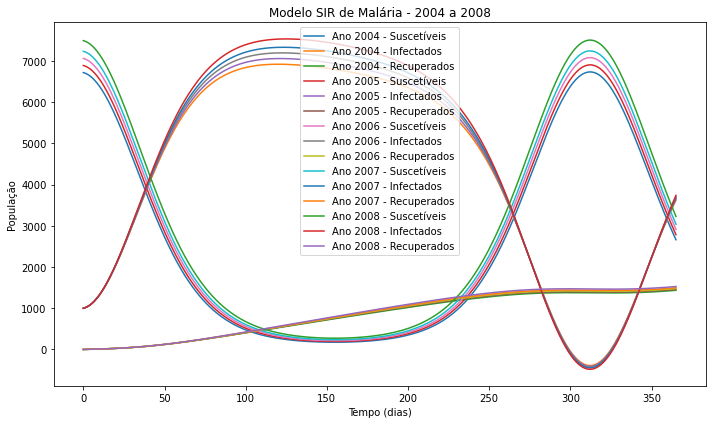

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

# Loop pelos anos de 2004 a 2008
for i, year in enumerate(range(2004, 2009)):
    
    pop_rural = [7717, 7889, 8061, 8233, 8492]
    N = pop_rural[i]  
    
    I_H0 = 1000
    if I_M0 is None:
        I_M0 = M / 100
    S_H0 = N - I_H0
    args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
            B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
            D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
            N, M, I_M0, I_H0)
    t_eval = np.linspace(0, 365, 1000)
    sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
    times = sol.t
    S, I, R = sol.y
    
    ax.plot(times, S, label=f'Ano {year} - Suscetíveis')
    ax.plot(times, I, label=f'Ano {year} - Infectados')
    ax.plot(times, R, label=f'Ano {year} - Recuperados')

ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('População')
ax.set_title('Modelo SIR de Malária - 2004 a 2008')
ax.legend()

plt.tight_layout()  # Ajusta o espaçamento entre os gráficos
plt.show()

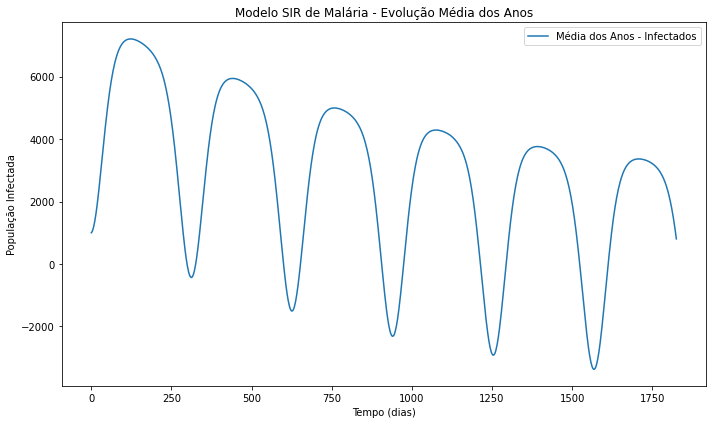

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

all_years_I = []

# Loop pelos anos de 2004 a 2008
for i, year in enumerate(range(2004, 2009)):
    
    pop_rural = [7717, 7889, 8061, 8233, 8492]
    N = pop_rural[i]  
    
    I_H0 = 1000
    if I_M0 is None:
        I_M0 = M / 100
    S_H0 = N - I_H0
    args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
            B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
            D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
            N, M, I_M0, I_H0)
    t_eval = np.linspace(0, 1825, 1000)
    sol = solve_ivp(lotkavolterra, [0, 1825], [S_H0, I_H0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
    times = sol.t
    S, I, R = sol.y
    
    all_years_I.append(I)
    

all_years_I = np.array(all_years_I)
mean_I = np.mean(all_years_I, axis=0)

ax.plot(times, mean_I, label='Média dos Anos - Infectados')

ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('População Infectada')
ax.set_title('Modelo SIR de Malária - Evolução Média dos Anos')
ax.legend()

plt.tight_layout()
plt.show()

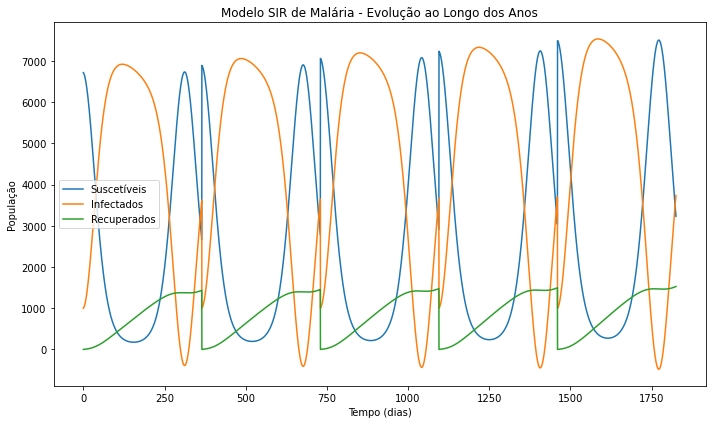

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

all_years_S = []
all_years_I = []
all_years_R = []

# Loop pelos anos de 2004 a 2008
for i, year in enumerate(range(2004, 2009)):
    
    pop_rural = [7717, 7889, 8061, 8233, 8492]
    N = pop_rural[i]  
    
    I_H0 = 1000
    if I_M0 is None:
        I_M0 = M / 100
    S_H0 = N - I_H0
    args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
            B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
            D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
            N, M, I_M0, I_H0)
    t_eval = np.linspace(0, 365, 1000)
    sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, 0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
    times = sol.t
    S, I, R = sol.y
    
    all_years_S.append(S)
    all_years_I.append(I)
    all_years_R.append(R)

all_years_S = np.concatenate(all_years_S, axis=0)    
all_years_I = np.concatenate(all_years_I, axis=0)
all_years_R = np.concatenate(all_years_R, axis=0)
time_total = np.linspace(0, 365 * 5, 1000 * 5)  # Tempo total de 5 anos

ax.plot(time_total, all_years_S, label='Suscetíveis')
ax.plot(time_total, all_years_I, label='Infectados')
ax.plot(time_total, all_years_R, label='Recuperados')

ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('População')
ax.set_title('Modelo SIR de Malária - Evolução ao Longo dos Anos')
ax.legend()

plt.tight_layout()
plt.show()

#### Colocando os 5 anos em sequência:

7717
7889
8061
8233
8492


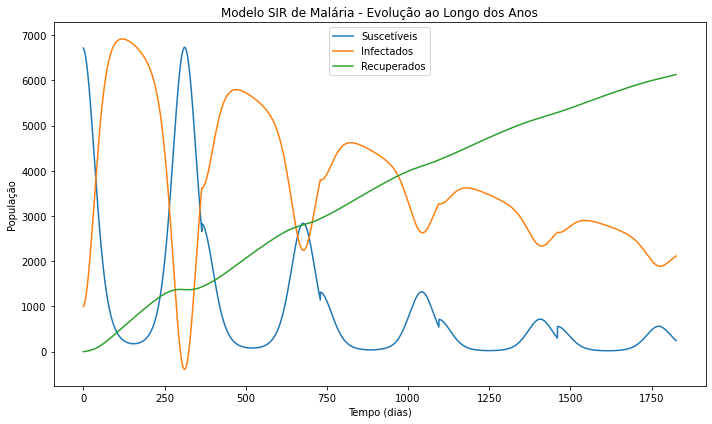

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))

all_years_S = []
all_years_I = []
all_years_R = []

for year in range(2004, 2009):
    pop_rural = [7717, 7889, 8061, 8233, 8492]
    N = pop_rural[year - 2004]
    print(N)
    
    if year == 2004:
        I_H0 = 1000
        R_H0 = 0
    else:
        I_H0 = all_years_I[-1][-1]
        R_H0 = all_years_R[-1][-1]

    if I_M0 is None:
        I_M0 = M / 100
    S_H0 = N - I_H0 - R_H0
    
    args = (T1, T2, omega1, phi1, R1, R2, omega2, phi2,
            B_E, p_ME, p_ML, p_MP, tau_E, tau_P, c1, c2,
            D1, b1, A, B, C, b2, tau_H, DD, Tmin, gamma, R_L,
            N, M, I_M0, I_H0)
    
    t_eval = np.linspace(0, 365, 1000)
    sol = solve_ivp(lotkavolterra, [0, 365], [S_H0, I_H0, R_H0], args=args, dense_output=True, t_eval=t_eval, method="DOP853")
    times = sol.t
    S, I, R = sol.y
    
    all_years_S.append(S)
    all_years_I.append(I)
    all_years_R.append(R)

all_years_S = np.concatenate(all_years_S, axis=0)    
all_years_I = np.concatenate(all_years_I, axis=0)
all_years_R = np.concatenate(all_years_R, axis=0)
time_total = np.linspace(0, 365 * 5, 1000 * 5)  # Tempo total de 5 anos

ax.plot(time_total, all_years_S, label='Suscetíveis')
ax.plot(time_total, all_years_I, label='Infectados')
ax.plot(time_total, all_years_R, label='Recuperados')

ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('População')
ax.set_title('Modelo SIR de Malária - Evolução ao Longo dos Anos')
ax.legend()

plt.tight_layout()
plt.show()

In [16]:
final_S = all_years_S[-1]
final_I = all_years_I[-1]
final_R = all_years_R[-1]

print(f"Valores finais no dia 1825:")
print(f"Suscetíveis: {final_S:.2f}")
print(f"Infectados: {final_I:.2f}")
print(f"Recuperados: {final_R:.2f}")

Valores finais no dia 1825:
Suscetíveis: 242.47
Infectados: 2116.85
Recuperados: 6132.69


In [17]:
112.66+2028.38+6350.96

8492.00000000000

In [38]:
time_points = [365, 730, 1095, 1460, 1825]  # Tempos específicos

# Calcula os índices correspondentes nos arrays de tempo
indices = []
for t in time_points:
    index = np.argmin(np.abs(time_total - t))
    indices.append(index)
print(indices)

for i, t in enumerate(time_points):
    index = indices[i]
    susc = all_years_S[index]
    inf = all_years_I[index]
    rec = all_years_R[index]
    total_population = susc + inf + rec
    print(f"Valores no tempo {t} dias:")
    print(f"Suscetíveis: {susc:.2f}")
    print(f"Infectados: {inf:.2f}")
    print(f"Recuperados: {rec:.2f}")
    print(f"População total: {total_population:.2f}")
    print("-" * 20)

[1000, 2000, 2999, 3999, 4999]
Valores no tempo 365 dias:
Suscetíveis: 2833.80
Infectados: 3620.29
Recuperados: 1434.91
População total: 7889.00
--------------------
Valores no tempo 730 dias:
Suscetíveis: 1317.24
Infectados: 3800.28
Recuperados: 2943.48
População total: 8061.00
--------------------
Valores no tempo 1095 dias:
Suscetíveis: 544.20
Infectados: 3273.72
Recuperados: 4243.08
População total: 8061.00
--------------------
Valores no tempo 1460 dias:
Suscetíveis: 301.13
Infectados: 2640.72
Recuperados: 5291.15
População total: 8233.00
--------------------
Valores no tempo 1825 dias:
Suscetíveis: 242.47
Infectados: 2116.85
Recuperados: 6132.69
População total: 8492.00
--------------------


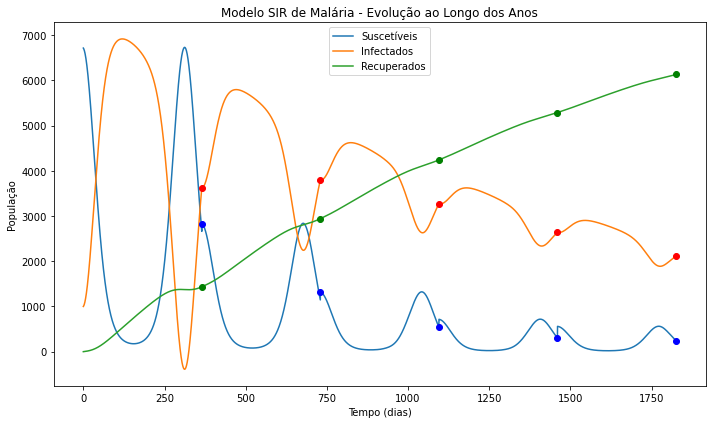

In [24]:
time_points = [365, 730, 1095, 1460, 1825]  # Tempos específicos

# Calcula os índices correspondentes nos arrays de tempo total
indices = [np.argmin(np.abs(time_total - t)) for t in time_points]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(time_total, all_years_S, label='Suscetíveis')
ax.plot(time_total, all_years_I, label='Infectados')
ax.plot(time_total, all_years_R, label='Recuperados')

for index in indices:
    ax.plot(time_total[index], all_years_S[index], 'bo')  # Ponto azul para o valor no tempo específico
    ax.plot(time_total[index], all_years_I[index], 'ro')  # Ponto vermelho para o valor no tempo específico
    ax.plot(time_total[index], all_years_R[index], 'go')  # Ponto verde para o valor no tempo específico

ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('População')
ax.set_title('Modelo SIR de Malária - Evolução ao Longo dos Anos')
ax.legend()

plt.tight_layout()
plt.show()

In [44]:
time_points = [365, 730, 1095, 1460, 1825]  # Tempos específicos

# Calcula os índices correspondentes nos arrays de tempo
indices = [999, 1999, 2999, 3999, 4999] 

for i, t in enumerate(time_points):
    index = indices[i]
    susc = all_years_S[index]
    inf = all_years_I[index]
    rec = all_years_R[index]
    total_population = susc + inf + rec
    print(f"Valores no tempo {t} dias:")
    print(f"Suscetíveis: {susc:.2f}")
    print(f"Infectados: {inf:.2f}")
    print(f"Recuperados: {rec:.2f}")
    print(f"População total: {total_population:.2f}")
    print("-" * 20)

Valores no tempo 365 dias:
Suscetíveis: 2661.80
Infectados: 3620.29
Recuperados: 1434.91
População total: 7717.00
--------------------
Valores no tempo 730 dias:
Suscetíveis: 1145.24
Infectados: 3800.28
Recuperados: 2943.48
População total: 7889.00
--------------------
Valores no tempo 1095 dias:
Suscetíveis: 544.20
Infectados: 3273.72
Recuperados: 4243.08
População total: 8061.00
--------------------
Valores no tempo 1460 dias:
Suscetíveis: 301.13
Infectados: 2640.72
Recuperados: 5291.15
População total: 8233.00
--------------------
Valores no tempo 1825 dias:
Suscetíveis: 242.47
Infectados: 2116.85
Recuperados: 6132.69
População total: 8492.00
--------------------


In [48]:
time_points = [0, 365, 366, 730, 731, 1095, 1096, 1460, 1461, 1825]  # Tempos específicos

# Calcula os índices correspondentes nos arrays de tempo
indices = [0, 999, 1000, 1999, 2000, 2999, 3000, 3999, 4000, 4999] 

for i, t in enumerate(time_points):
    index = indices[i]
    susc = all_years_S[index]
    inf = all_years_I[index]
    rec = all_years_R[index]
    total_population = susc + inf + rec
    print(f"Valores no tempo {t} dias:")
    print(f"Suscetíveis: {susc:.2f}")
    print(f"Infectados: {inf:.2f}")
    print(f"Recuperados: {rec:.2f}")
    print(f"População total: {total_population:.2f}")
    print("-" * 20)

Valores no tempo 0 dias:
Suscetíveis: 6717.00
Infectados: 1000.00
Recuperados: 0.00
População total: 7717.00
--------------------
Valores no tempo 365 dias:
Suscetíveis: 2661.80
Infectados: 3620.29
Recuperados: 1434.91
População total: 7717.00
--------------------
Valores no tempo 366 dias:
Suscetíveis: 2833.80
Infectados: 3620.29
Recuperados: 1434.91
População total: 7889.00
--------------------
Valores no tempo 730 dias:
Suscetíveis: 1145.24
Infectados: 3800.28
Recuperados: 2943.48
População total: 7889.00
--------------------
Valores no tempo 731 dias:
Suscetíveis: 1317.24
Infectados: 3800.28
Recuperados: 2943.48
População total: 8061.00
--------------------
Valores no tempo 1095 dias:
Suscetíveis: 544.20
Infectados: 3273.72
Recuperados: 4243.08
População total: 8061.00
--------------------
Valores no tempo 1096 dias:
Suscetíveis: 716.20
Infectados: 3273.72
Recuperados: 4243.08
População total: 8233.00
--------------------
Valores no tempo 1460 dias:
Suscetíveis: 301.13
Infectados: 